In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('numeric data1.csv')

In [3]:
data.head(5)

,Unnamed: 0,Male,SeniorCitizen,Partner,Dependents,LiveAlone,tenure,PhoneService,MultipleLines,PhoneOnly,...,Add-ons,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Credit card (automatic),Bank transfer (automatic),Electronic check,Mailed check
0,0,1,0,1,1,0,72,1,1,1,...,0,1,0,24.10,1734.65,0,1,0,0,0
1,1,0,0,0,0,1,44,1,0,0,...,1,0,1,88.15,3973.20,0,1,0,0,0
2,2,0,1,1,0,0,38,1,1,0,...,0,0,1,74.95,2869.85,1,0,1,0,0
3,3,1,0,0,0,1,4,1,0,0,...,1,0,1,55.90,238.50,0,0,0,1,0
4,4,1,0,0,0,1,2,1,0,0,...,1,0,0,53.45,119.50,0,0,0,1,0


In [4]:
data = data.drop('Unnamed: 0', axis = 1)

In [5]:
data.columns

Index(['Male', 'SeniorCitizen', 'Partner', 'Dependents', 'LiveAlone', 'tenure',
       'PhoneService', 'MultipleLines', 'PhoneOnly', 'PhoneAndInternetOnly',
       'InternetService', 'Fiber optic', 'DSL', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Add-ons', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Credit card (automatic)',
       'Bank transfer (automatic)', 'Electronic check', 'Mailed check'],
      dtype='object')

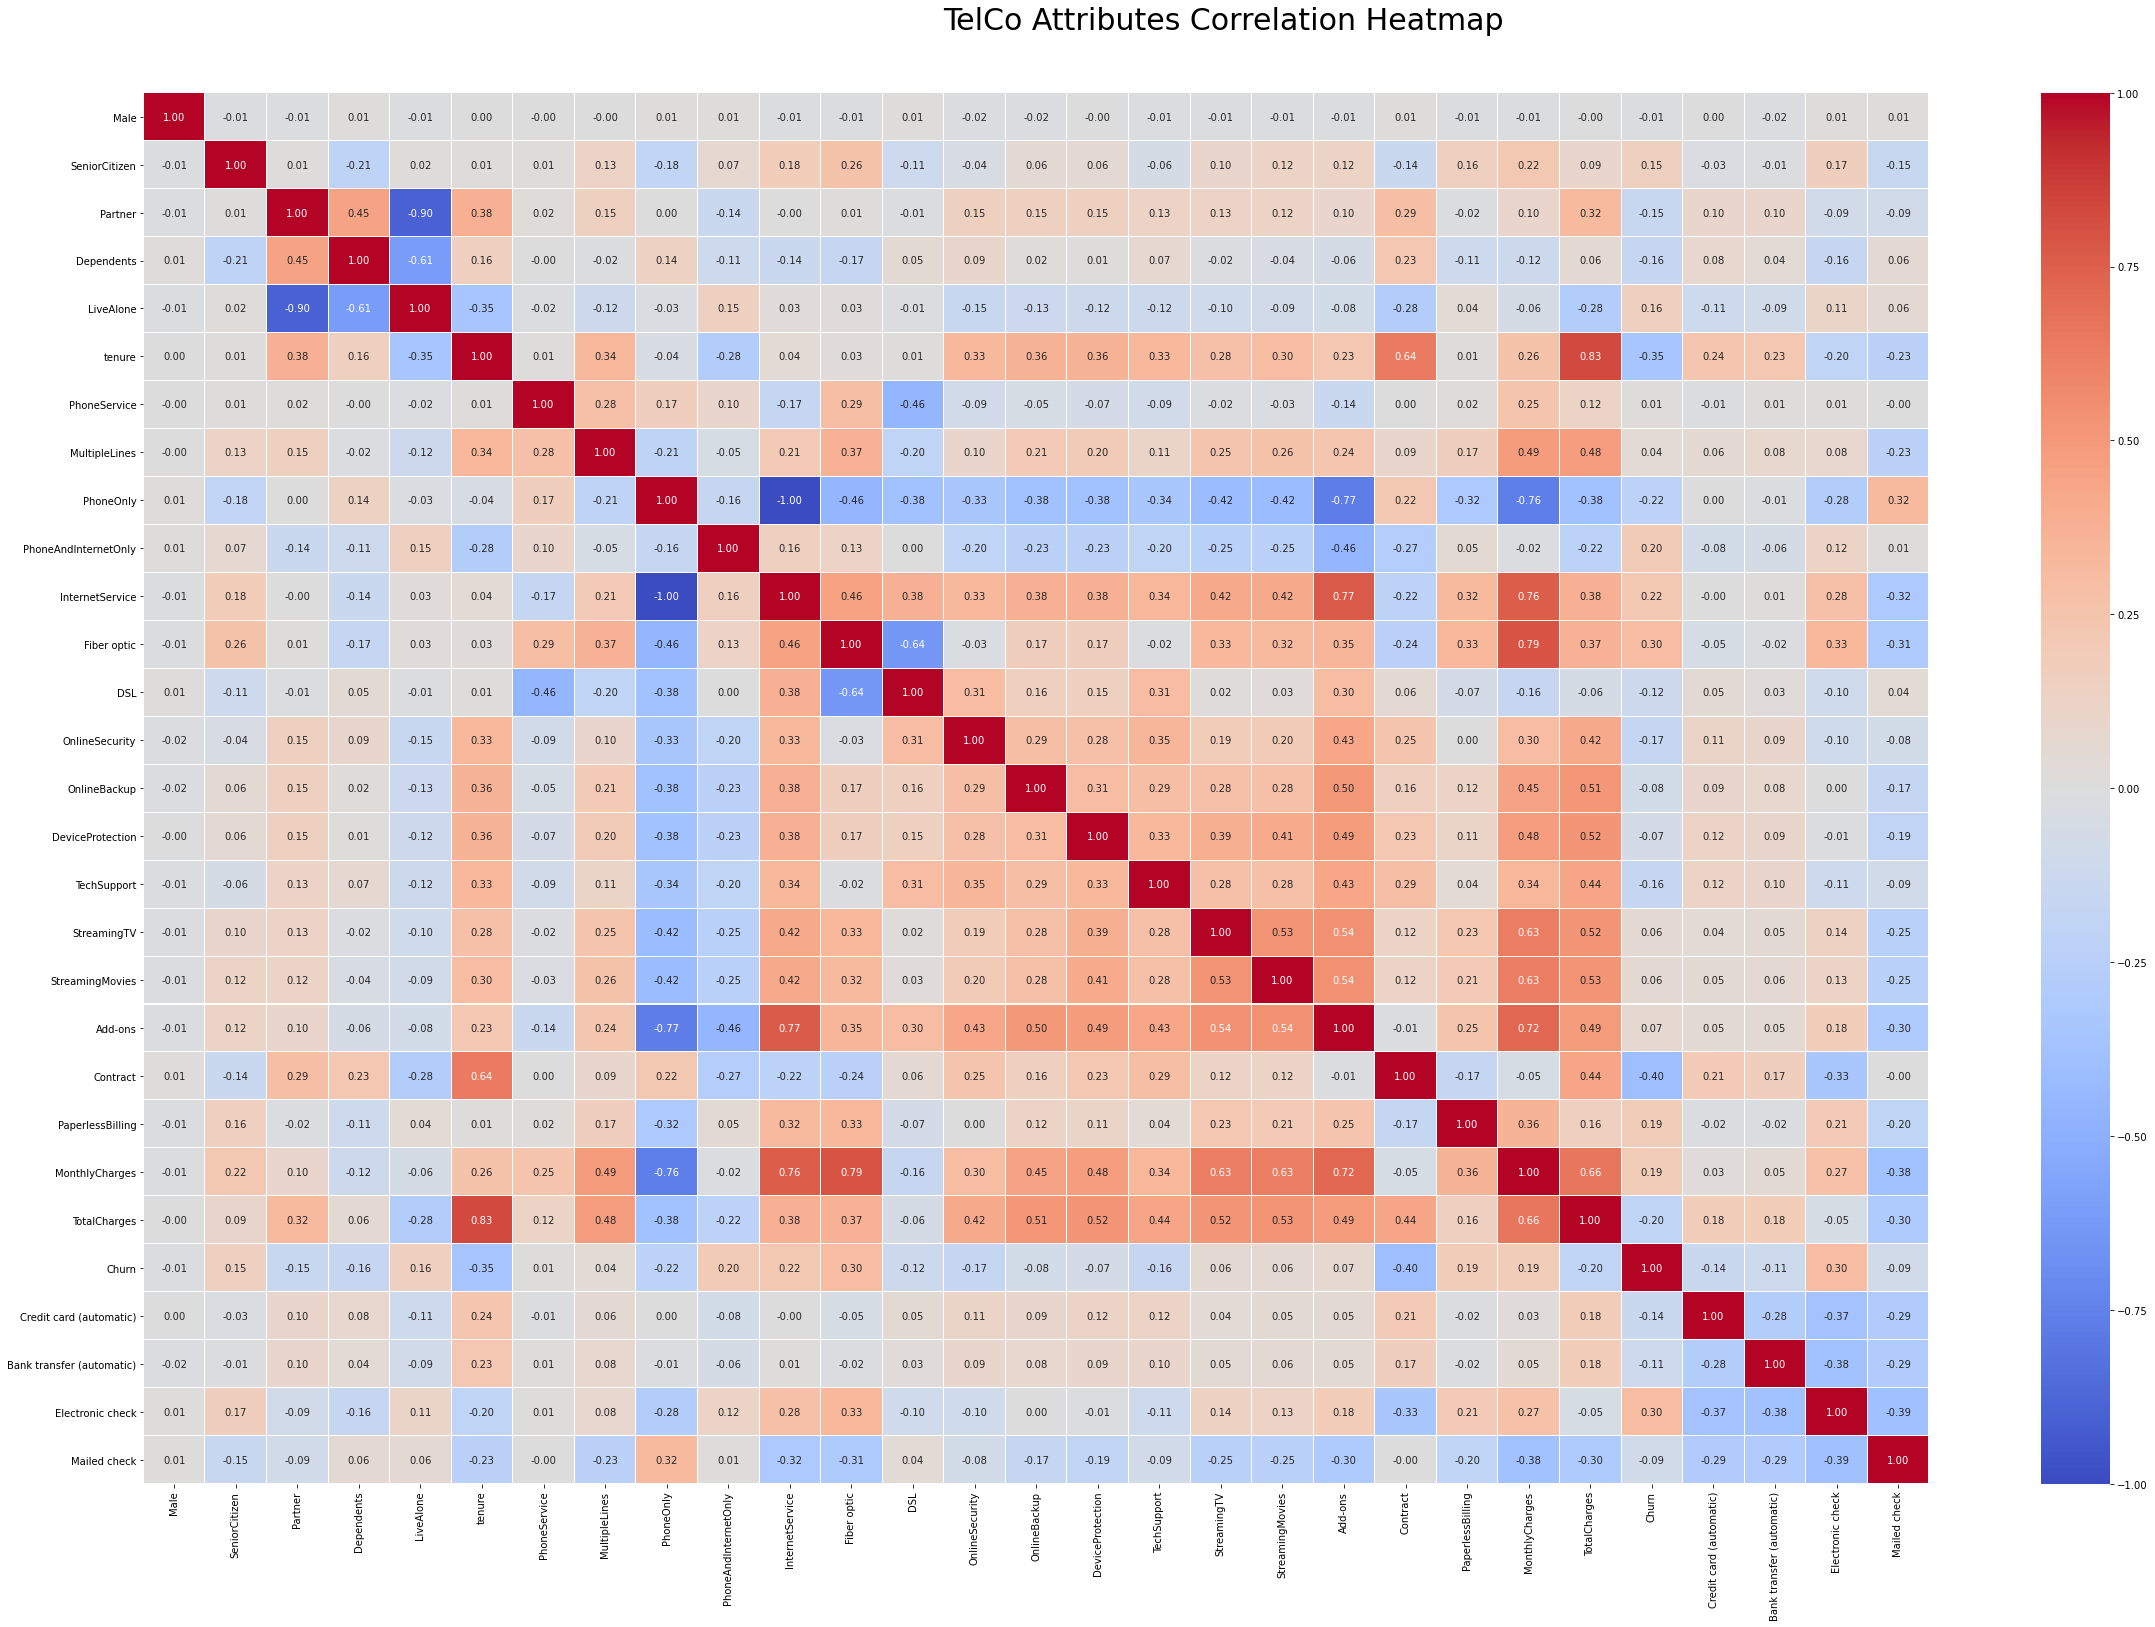

In [6]:
f, ax = plt.subplots(figsize=(40, 24))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('TelCo Attributes Correlation Heatmap', fontsize=30)

In [7]:
toinclude = ['SeniorCitizen', 'Dependents', 'tenure','PhoneOnly','Fiber optic', 'OnlineSecurity','TechSupport', 'Contract',
       'PaperlessBilling','MonthlyCharges','Electronic check']

In [8]:
X = data[toinclude]
y = data["Churn"]

In [9]:
X.columns

Index(['SeniorCitizen', 'Dependents', 'tenure', 'PhoneOnly', 'Fiber optic',
       'OnlineSecurity', 'TechSupport', 'Contract', 'MonthlyCharges',
       'Electronic check'],
      dtype='object')

In [10]:
from sklearn import model_selection
#split train 70% and test 30%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state = 420)

In [11]:
lm_1 = sm.Logit(y_train, X_train).fit()
print(lm_1.summary())

Optimization terminated successfully.
         Current function value: 0.427228
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4190
Model:                          Logit   Df Residuals:                     4180
Method:                           MLE   Df Model:                            9
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                  0.2588
Time:                        23:13:39   Log-Likelihood:                -1790.1
converged:                       True   LL-Null:                       -2415.2
Covariance Type:            nonrobust   LLR p-value:                1.699e-263
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
SeniorCitizen        0.2417      0.108      2.236      0.025       0.030       0.454
Dependents 

In [12]:
def churn(some_value):
    if some_value >= threshold:
        return math.ceil(some_value)
    else:
        return math.floor(some_value)
        

In [13]:
threshold = 0.45

In [14]:
yhat = lm_1.predict(X_test)
predictions = list(map(churn, yhat))

In [15]:
yhat

2347    0.183526
3411    0.333571
108     0.027745
3303    0.377244
2564    0.011055
          ...   
105     0.720194
5883    0.039384
935     0.326904
4495    0.734630
535     0.429616
Length: 1796, dtype: float64

In [16]:
yhat.describe()

count    1796.000000
mean        0.274492
std         0.246517
min         0.009923
25%         0.057433
50%         0.180871
75%         0.475044
max         0.801693
dtype: float64

In [17]:
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1312
           1       0.61      0.62      0.61       484

    accuracy                           0.79      1796
   macro avg       0.73      0.73      0.73      1796
weighted avg       0.79      0.79      0.79      1796

[[1118  194]
 [ 185  299]]


Text(0.5, 15.0, 'Predictions')

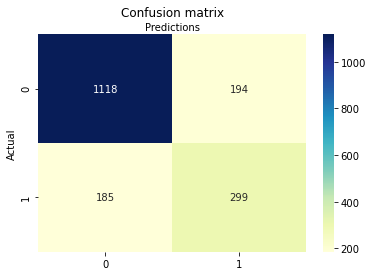

In [18]:
con_matrix = metrics.confusion_matrix(y_test, predictions)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predictions')